# Capstone Project: Post-Covid Mental Health Status

## Problem Statement
The ongoing Household Pulse Survey conducted in the States aims to measure household experiences during the coronvarius pandemic. This unprecendented spread of disease is predicted to have a long-tail effect on the mental health of people. Moreover, the lack of mental heath literacy/awareness has discouraged people from seeking the help they need. In order identify this susceptible group of people as well as to understand and quantify importance of factors that drive such a vulnerability/resistance to seeking mental aid, I aim to build a binary classification model whose performance is measured by ROC-AUC and recall scores to predict the likelihood of the development of mental health distress. Factors such as employment status,food security and health status would be included in my model and I will make well-informed recommendations to better tackle the root causes of such an illness.

## Executive Summary
The recent COVID pandemic has caused much distraught in every aspect of human society. The fear of an uncurable foreign illness, loss of jobs and mandatory isolation of the infected and predisposed populations have been overwhelming. In addition to the detrimental effects of COVID on the physical health of people, it has also brought to light the implications of such an unprecedented pandemic on the mental health of people. There is now an increasing need to destigmatize mental health and to provide early interventions before associated problems manifest. Therefore, we aim to develop a model to predict susceptible populations to developing mental health problems and to curb the root of such issues before they manifest into a greater problem. We aim to provide well-informed suggestions to stateboards and mental health institutes on where to focus and channel resources. In addition, we strive to understand the underlying root causes of such mental distress through analyzing survey responses on different aspects of lifelihood, such as food security, employment status and many more.

## Risk and assumptions

The dataset consists of a set of questionaries which are heavily subjected to the bias of respondents. Moreover, many of the questions are correlated and thus dependent. This would affect the performance of our model as the assumption that features are independent is ivolated

## Contents

In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import re

## Data Visualization

In [62]:
# Reading the csv file
df = pd.read_csv('../datasets/pulse2020_puf_13.csv')

In [4]:
# Number of columns and rows in data
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 109051
Columns: 188


In [5]:
# Looking at the first 5 rows of data
df.head()

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,...,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME
0,V130000001S12010403200123,13,48,19100.0,2,1276.886650,1278.107099,1989,2,1,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,2
1,V130000001S34010154300113,13,1,NaN,2,1195.578846,2323.078960,1988,2,2,...,-99,-99,-99,1,1,-99,1,-99,1,6
2,V130000001S37010241600123,13,1,NaN,2,1124.648326,1092.628425,1969,2,1,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,7
3,V130000001S37010645600123,13,1,NaN,2,517.598058,1005.723011,1947,2,1,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,6
4,V130000001S70011963510113,13,1,NaN,2,432.646602,840.657411,1968,2,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88


In [24]:
# Statistical summary of features
df.describe()

,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,...,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME
count,109051.0,109051.000000,35244.000000,109051.000000,109051.000000,109051.000000,109051.000000,109051.000000,109051.000000,109051.000000,...,109051.000000,109051.000000,109051.000000,109051.000000,109051.000000,109051.000000,109051.00000,109051.000000,109051.000000,109051.000000
mean,13.0,27.699242,31792.698899,2.685239,1114.342647,2284.902624,1969.251974,1.991793,1.587753,1.993095,...,-84.786559,-89.458684,-88.606789,-81.777875,-88.182217,-87.666862,-86.22075,-86.225335,-88.262914,-16.580215
std,0.0,16.409699,11514.840187,1.079868,1755.280822,4156.272497,15.953085,0.090221,0.492242,0.082809,...,19.677547,5.565538,9.959077,24.361783,11.516732,13.143646,16.80769,16.797533,11.238543,39.391120
min,13.0,1.000000,12060.000000,1.000000,19.994057,19.635651,1932.000000,1.000000,1.000000,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,-99.000000
25%,13.0,12.000000,19100.000000,2.000000,332.761427,555.814095,1956.000000,2.000000,1.000000,2.000000,...,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.00000,-88.000000,-88.000000,1.000000
50%,13.0,27.000000,35620.000000,3.000000,604.820254,1125.616392,1969.000000,2.000000,2.000000,2.000000,...,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.00000,-88.000000,-88.000000,4.000000
75%,13.0,42.000000,41860.000000,4.000000,1179.949186,2348.620985,1982.000000,2.000000,2.000000,2.000000,...,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.00000,-88.000000,-88.000000,6.000000
max,13.0,56.000000,47900.000000,4.000000,110618.302480,228944.991150,2002.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,8.000000


In [63]:
# Checking for columns with null values
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['EST_MSA'], dtype='object')

In [64]:
# Displaying percentage of null values in EST_MSA columns
df[null_columns].isnull().sum()/len(df) * 100

EST_MSA    67.681177
dtype: float64

Since responses -88 and -99 represent missing values, they would be grouped together and replaced with null instead.

In [65]:
# Converting all missing values to np.nan
for col in df.columns:
    try:
        df[col] = df[col].map(lambda x: np.nan if (x == -88) | (x == -99) else x)
    except ValueError:
        print(f'{col} cannot be converted to null values')

In [66]:
# Checking for columns with null values
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['EST_MSA', 'MS', 'WRKLOSS', 'EXPCTLOSS', 'ANYWORK', 'KINDWORK',
       'RSNNOWRK', 'TW_START', 'UNEMPPAY', 'UI_APPLY',
       ...
       'PSWHYCHG1', 'PSWHYCHG2', 'PSWHYCHG3', 'PSWHYCHG4', 'PSWHYCHG5',
       'PSWHYCHG6', 'PSWHYCHG7', 'PSWHYCHG8', 'PSWHYCHG9', 'INCOME'],
      dtype='object', length=165)

In [67]:
# Displaying percentage of null values in all columns with null values
percent_null = {}
for col in null_columns:
    percent_null[col] = (df[col].isnull().sum()/len(df)) * 100
sorted_percent_null = dict(sorted(percent_null.items(),key = lambda x: x[1],reverse = True))
sorted_percent_null

{'SNAPMNTH9': 100.0,
 'SNAPMNTH10': 100.0,
 'SNAPMNTH11': 100.0,
 'SNAPMNTH12': 100.0,
 'WHEREFREE5': 99.9138017991582,
 'SSAPGM3': 99.8771217136936,
 'PSWHYCHG2': 99.80834655344746,
 'SSAEXPCT3': 99.79367451926163,
 'WHEREFREE3': 99.77808548293918,
 'PSCHNG5': 99.77258347011949,
 'INTRNT3': 99.74415640388442,
 'SSAPGM4': 99.71939734619582,
 'COMP3': 99.68913627568752,
 'PSCHNG6': 99.55800497015159,
 'INTRNT1': 99.51949088041376,
 'PSCHNG7': 99.51123786118423,
 'WHYCHNGD6': 99.37735554923843,
 'SSAPGM2': 99.36360051718921,
 'SSAPGM1': 99.22696719883358,
 'SSAPGM5': 99.22421619242373,
 'SSAEXPCT4': 99.08024685697518,
 'PSWHYCHG3': 98.95645156853216,
 'WHEREFREE4': 98.86841936341712,
 'SSAEXPCT2': 98.83449028436236,
 'WHEREFREE6': 98.81615024163007,
 'PSWHYCHG9': 98.61257576730154,
 'PSWHYCHG5': 98.53187957927942,
 'WHYCHNGD12': 98.48236146390221,
 'WHEREFREE7': 98.31179906649183,
 'FOODSUFRSN4': 98.2980440344426,
 'WHEREFREE2': 98.2742019788906,
 'WHEREFREE1': 98.2622809511146,
 'PSPLAN

#### Dropping unnecessary columns MAYBe?


In [ ]:
df.drop(columns = ['COMPAVAIL','COMP1','COMP2','COMP3','INTRNTAVAIL'])

**Analysis of all missing columns**<br>
Analyzing missing columns and understanding reasons behind them to better understand how to deal with them.

**`WHEREFREE`**<br>
Questions that ask where people are seeking food aid from

In [68]:
food_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('WHERE')}
food_dict

{'WHEREFREE5': 99.9138017991582,
 'WHEREFREE3': 99.77808548293918,
 'WHEREFREE4': 98.86841936341712,
 'WHEREFREE6': 98.81615024163007,
 'WHEREFREE7': 98.31179906649183,
 'WHEREFREE2': 98.2742019788906,
 'WHEREFREE1': 98.2622809511146}

All `WHEREFREE` columns have > 98% of their data missing and this is because responses to these questions are determined by the responses to `FREEFOOD`. Zooming into the people who are getting food aid, we can look at where they acquire them.

In [69]:
where_free = df[list(food_dict.keys())][df['FREEFOOD'] == 1].count()
where_free

WHEREFREE5      94
WHEREFREE3     242
WHEREFREE4    1234
WHEREFREE6    1291
WHEREFREE7    1841
WHEREFREE2    1882
WHEREFREE1    1895
dtype: int64

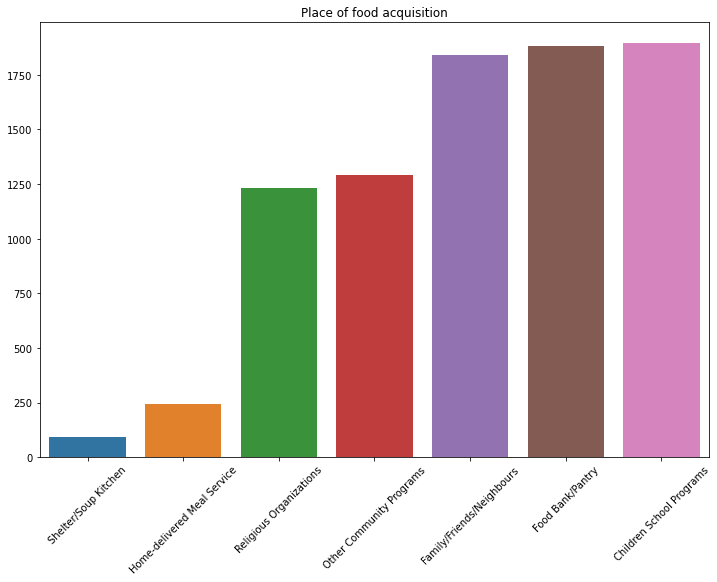

In [70]:
# Graph that shows where people are seeking food aid from
plt.figure(figsize = (12,8))
sns.barplot(x = where_free.index,y = where_free.values).set_xticklabels(['Shelter/Soup Kitchen','Home-delivered Meal Service',
                                                                         'Religious Organizations','Other Community Programs',
                                                                         'Family/Friends/Neighbours','Food Bank/Pantry','Children School Programs'])
plt.title('Place of food acquisition')
plt.xticks(
    rotation=45, 
#     horizontalalignment='left',
    fontweight='light'
#     fontsize='x-large'  
);

Graph shows that schools are the most popular avenue of food aid which are targetted mainly at children, followed by food banks/pantries.

In [71]:
df.FREEFOOD.value_counts(dropna = False).sort_index()

1.0     5775
2.0    93076
NaN    10200
Name: FREEFOOD, dtype: int64

In [72]:
freefood_df = pd.DataFrame({
    'Response(value)':[i for i in df.FREEFOOD.value_counts(dropna = False).sort_index().index],
    'Response(actual)':['Got Free Food','Didnt Get Free Food','Missing'],
    'Number':[i for i in df.FREEFOOD.value_counts(dropna = False).sort_index().values],
    'Percentage':[round(i,3) for i in df.FREEFOOD.value_counts(dropna = False,normalize = True).sort_index().values*100]
})
# freefood_df.set_index('Response(value)')
freefood_df

,Response(value),Response(actual),Number,Percentage
0,1.0,Got Free Food,5775,5.296
1,2.0,Didnt Get Free Food,93076,85.351
2,NaN,Missing,10200,9.353


In [73]:
# Percentage of people who obtained free meals/groceries in the last 7 days
pd.DataFrame(data = (df['FREEFOOD'].fillna('Missing').value_counts(normalize = True)*100),index = ['Missing',1,2])

,FREEFOOD
Missing,9.353422
1,5.295687
2,85.350891


5% of the population across the states are receiving food aids from various avenues as shown above.

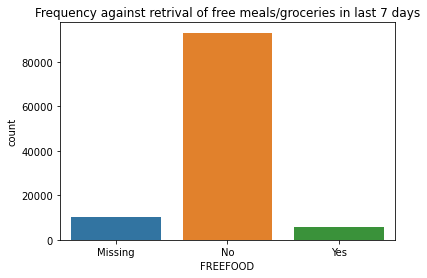

In [15]:
# Bar graph of count against retrival of free food
g = sns.countplot(df['FREEFOOD'].fillna('Missing'), order = ['Missing',2,1])
g.set_xticklabels(['Missing','No','Yes'])
plt.title('Frequency against retrival of free meals/groceries in last 7 days');

In [74]:
# There might be overlaps!! Some people receive aid from more than 1 place.
where_free.sum()

8479

In [75]:
# Replace all null values in WHEREFREE columns as 0 if if they are not 1
for i in where_free.keys():
    df[i] = df[i].replace(np.nan,0)

**`SSAPGM`**

In [76]:
ssapgm_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('SSAPGM')}
ssapgm_dict

{'SSAPGM3': 99.8771217136936,
 'SSAPGM4': 99.71939734619582,
 'SSAPGM2': 99.36360051718921,
 'SSAPGM1': 99.22696719883358,
 'SSAPGM5': 99.22421619242373}

There are many missing `SSAPGM` values as responses are determined by the answers to `SSA_APPLY`. 

In [77]:
# Frequency of answers to SSA_APPLY
df.SSA_APPLY.value_counts(dropna = False).sort_index()

1.0     2522
2.0    97791
NaN     8738
Name: SSA_APPLY, dtype: int64

In [78]:
ssa_df = pd.DataFrame({
            'Response(value)':[i for i in df.SSA_APPLY.value_counts(dropna = False).sort_index().index],
            'Response(actual)':['Did Apply','Didnt Apply','Missing'],
            'Number':[i for i in df.SSA_APPLY.value_counts(dropna = False).sort_index().values],
            'Percentage' : [round(i*100,3) for i in df.SSA_APPLY.value_counts(dropna = False,normalize = True).sort_index().values]})
ssa_df


,Response(value),Response(actual),Number,Percentage
0,1.0,Did Apply,2522,2.313
1,2.0,Didnt Apply,97791,89.675
2,NaN,Missing,8738,8.013


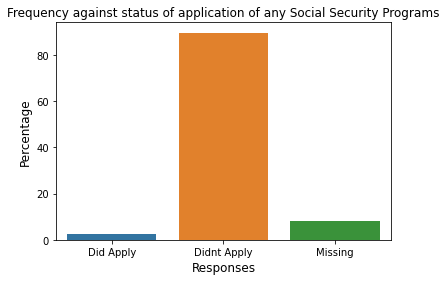

In [21]:
# Plotting frequency against status of application of SSP
plt.figure(figsize = (6,4))
sns.barplot(x = ssa_df['Response(actual)'], y = ssa_df['Percentage'])
plt.title('Frequency against status of application of any Social Security Programs')
plt.xlabel('Responses',fontsize = 12)
plt.ylabel('Percentage',fontsize = 12);

Since 89% of the respondents did not apply for any Social Security Programs and 8% left the question empty, the number responses to `SSAPGM` is very low. 

The `SSAPGM` questions are only answered if `SSA_APPLY` is responded with a yes and therefore as expected, the number of responses are very low. However, it would still be worthwhile to keep them. 

In [15]:
ssapgm = df[list(ssapgm_dict.keys())].count()
ssapgm

SSAPGM3    134
SSAPGM4    306
SSAPGM2    694
SSAPGM1    843
SSAPGM5    846
dtype: int64

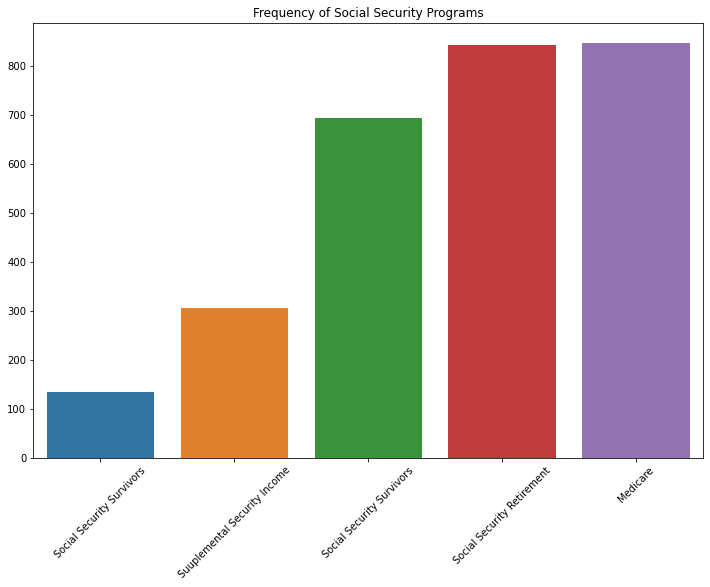

In [176]:
plt.figure(figsize = (12,8))
sns.barplot(x = ssapgm.index,y = ssapgm.values).set_xticklabels(['Social Security Survivors','Suuplemental Security Income',
                                                                'Social Security Survivors','Social Security Retirement','Medicare'])
plt.title('Frequency of Social Security Programs')
plt.xticks(
    rotation=45, 
#     horizontalalignment='left',
    fontweight='light'
#     fontsize='x-large'  
);

In [79]:
# Replacing all null values as 0
for i in ssapgm_dict.keys():
    df[i] = df[i].replace(np.nan,0)

**`PSCHNG`**

In [80]:
# Looking at the frequency of missing values in PSCHNG columns
pschng_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('PSCHNG')}
pschng_dict

{'PSCHNG5': 99.77258347011949,
 'PSCHNG6': 99.55800497015159,
 'PSCHNG7': 99.51123786118423,
 'PSCHNG4': 97.9734252780809,
 'PSCHNG1': 94.67863660122327,
 'PSCHNG2': 94.01564405645065,
 'PSCHNG3': 91.59750942219695}

In [81]:
pschng.sum()

24965

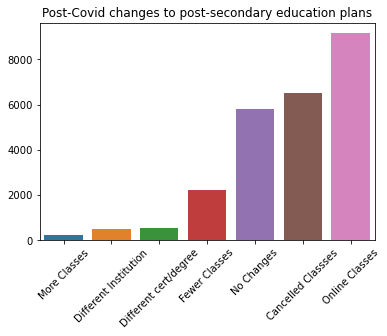

In [82]:
# Looking at the distribution of changes to post-secondary education
pschng = df[list(pschng_dict.keys())].count()
sns.barplot(x = pschng.index,y = pschng.values).set_xticklabels(['More Classes','Different Institution','Different cert/degree','Fewer Classes',
                                                                'No Changes','Cancelled Classses','Online Classes']);
plt.xticks(rotation = 45)
plt.title('Post-Covid changes to post-secondary education plans');

The `PSCHNG` questions are only answered if `TNUM_PS` is responded with a yes and therefore as expected, the number of responses are very low. However, it would still be worthwhile to keep them. 

In [93]:
# replacing all null values in PSCHNG with 0
for i in pschng_dict.keys():
    df[i] = df[i].replace(np.nan,0)

These questions asked for changes to post-secondary education plans if there are members in the household who planned to enroll in post-secondary classes(`TNUM_PS` > 0)

In [83]:
tnum_df = pd.DataFrame({
    'Response(value)':[i for i in df.TNUM_PS.value_counts(dropna = False).sort_index().index],
    'Response(actual)':['0 Member','1 Member','2 Members','3 Members','Missing'],
    'Number':[i for i in df.TNUM_PS.value_counts(dropna = False).sort_index().values],
    'Percentage': [round(i*100,3) for i in df.TNUM_PS.value_counts(dropna = False,normalize = True).sort_index().values]
})
tnum_df

,Response(value),Response(actual),Number,Percentage
0,0.0,0 Member,64277,58.942
1,1.0,1 Member,15852,14.536
2,2.0,2 Members,4534,4.158
3,3.0,3 Members,1277,1.171
4,NaN,Missing,23111,21.193


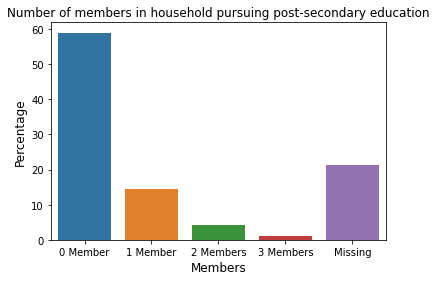

In [84]:
# Frequency of members who are pursuing post-secondary education
sns.barplot(x = tnum_df['Response(actual)'], y = tnum_df['Percentage'])
plt.title('Number of members in household pursuing post-secondary education')
plt.xlabel('Members',fontsize = 12)
plt.ylabel('Percentage',fontsize = 12);

There is a large percentage of missing data `TNUM_PS` and thus dropping it would result in a huge loss of data. It would be imputed as a separate class on its own first.

In [85]:
# Replace all the null values with 'missing'
df['TNUM_PS'] = df['TNUM_PS'].replace(np.nan,'Missing')

Among those pursuing post-secondary programs, many of the classes are now online or are cancelled. 

**`PSWHYCHG`** <br>
These questions asked for reasons behind changes to post-secondary education plans as stated above.

In [86]:
pswhychg_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('PSWHYCHG')}
pswhychg_dict

{'PSWHYCHG2': 99.80834655344746,
 'PSWHYCHG3': 98.95645156853216,
 'PSWHYCHG9': 98.61257576730154,
 'PSWHYCHG5': 98.53187957927942,
 'PSWHYCHG6': 98.0165243785018,
 'PSWHYCHG8': 96.57499701974305,
 'PSWHYCHG7': 96.57041200905998,
 'PSWHYCHG1': 95.13622066739416,
 'PSWHYCHG4': 92.12753665716042}

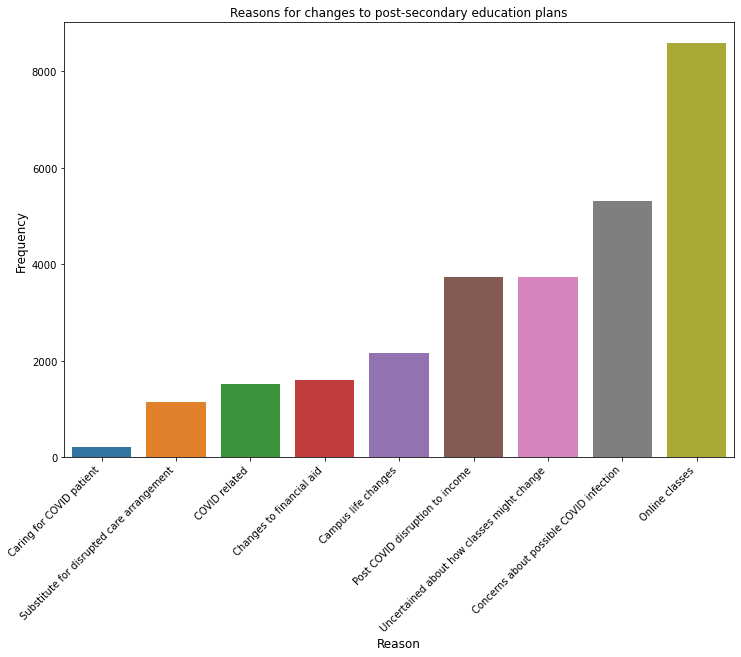

In [53]:
# Plotting graph of reasons for changes to post-sec education plans
pswhychg_df = df[[k for k in pswhychg_dict.keys()]].count()
plt.figure(figsize = (12,8))
sns.barplot(x = pswhychg_df.index,y = pswhychg_df.values).set_xticklabels(['Caring for COVID patient','Substitute for disrupted care arrangement','COVID related',
                                                                          'Changes to financial aid','Campus life changes','Post COVID disruption to income','Uncertained about how classes might change',
                                                                          'Concerns about possible COVID infection','Online classes'])
plt.title('Reasons for changes to post-secondary education plans')
plt.xticks(rotation = 45,horizontalalignment='right')
plt.xlabel('Reason',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12);

Since these questions are highly related and dependent on the `PSCHNG` features as well as `TNUM_PS`, these columns would be dropped to prevent overfitting of the model. 

In [87]:
# Dropping `PSWHYCHG` features
df.drop(columns = [k for k in pswhychg_df.keys()],inplace = True)

**`SNAPMNTH`**

In [89]:
snap_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('SNAPMNTH')}
snap_dict

{'SNAPMNTH9': 100.0,
 'SNAPMNTH10': 100.0,
 'SNAPMNTH11': 100.0,
 'SNAPMNTH12': 100.0,
 'SNAPMNTH1': 96.57224601333321,
 'SNAPMNTH2': 96.51539188086308,
 'SNAPMNTH3': 96.03671676555007,
 'SNAPMNTH4': 95.60297475493118,
 'SNAPMNTH5': 95.29486203702855,
 'SNAPMNTH6': 95.07294751996773,
 'SNAPMNTH8': 94.97024328066685,
 'SNAPMNTH7': 94.93539719947547}

The high percentage of null values of > 90% in all `SNAPMNTH` columns(`SNAPMNTH1`-`SNAPMNTH12`) suggest a lack of awareness or exposure to the Supplemental Nutrition Assistance Program(SNAP) or Food Stamp Program which is recorded in `SNAP_YN`

In [90]:
# Looking at the percentage of people who received the SNAP receipt
df['SNAP_YN'].value_counts(normalize = True, dropna = False) * 100

2.0    83.787402
NaN     9.903623
1.0     6.308975
Name: SNAP_YN, dtype: float64

Based on the `SNAP_YN` column which indicates if households have benefitted from the SNAP program, 91% of the population responded that they **do not** have access to such an aid which answers for the high null values in the `SNAPMNTH` columns. Since majority of the data is missing and `SNAP_YN` is sufficient to account for the low participation rate to SNAP programs, they would be dropped. The month of SNAP application is not meaningful for our model and thus can be dropped

**Dropping the SNAPMNTH columns**

In [91]:
# Dropping SNAPMNTH columns
df.drop(columns = [k for k in snap_dict.keys()],inplace = True)

**`EVICT`**

The next feature with many null values would be `EVICT` which asks how likely the household will have to be evicted in the next 2 months. This question is only asked if `TENURE` is answered as 3/Rented and `RENTCUR` is 2/no

In [96]:
# Removal of missing values from EVICT
df['EVICT'].value_counts(dropna = False,normalize = True) * 100

NaN    97.739590
3.0     0.699673
2.0     0.678582
4.0     0.552035
1.0     0.330121
Name: EVICT, dtype: float64

Since most of the data are missing and `EVICT` is dependent on responses to `TENURE` and `RENTCUR`, this column can be dropped. The other columns would be sufficient to account for the status of eviction in our model.

In [97]:
# Dropping EVICT column
df.drop(columns = ['EVICT'],inplace = True)

**`SSAEXPCT`** <br>
These questions are asked only if response to the application of Social Security Programs(SSP) in the next 12 months/`SSALIKELY` is likely(1-3). 

In [108]:
ssaexpct_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('SSAEXPCT')}
ssaexpct_dict

{'SSAEXPCT3': 99.79367451926163,
 'SSAEXPCT4': 99.08024685697518,
 'SSAEXPCT2': 98.83449028436236,
 'SSAEXPCT5': 98.16782973104327,
 'SSAEXPCT1': 98.13756866053498}

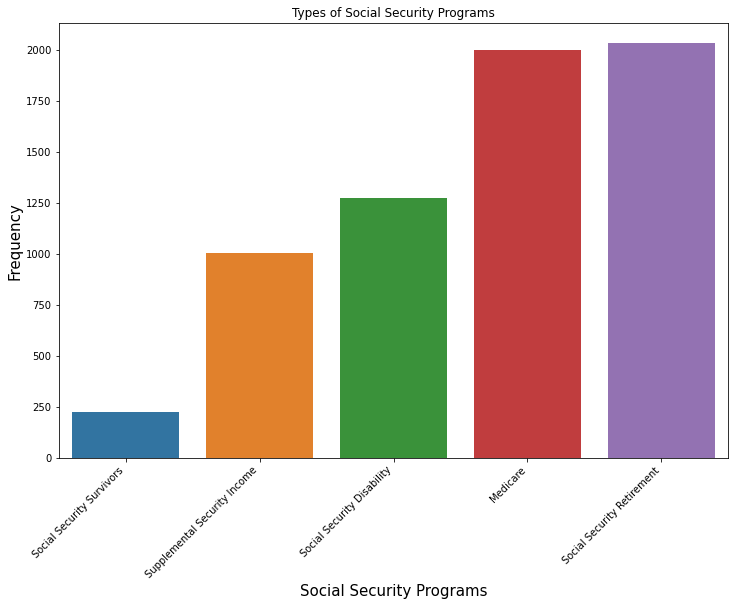

In [125]:
# Plotting graph against type of SSP program applied
plt.figure(figsize = (12,8))
ssaexpct_df = df[[k for k in ssaexpct_dict.keys()]].count()
sns.barplot(x = ssaexpct_df.index, y = ssaexpct_df.values).set_xticklabels(['Social Security Survivors','Supplemental Security Income','Social Security Disability',
                                                                            'Medicare','Social Security Retirement'])

plt.title('Types of Social Security Programs')
plt.ylabel('Frequency',fontsize = 15)
plt.xlabel('Social Security Programs',fontsize = 15)
plt.xticks(rotation = 45,horizontalalignment='right');

**`SSALIKELY`**

In [130]:
df['SSALIKELY'].value_counts(dropna = False,normalize = True)*100

4.0    65.274046
NaN    29.546726
3.0     2.923403
1.0     1.255376
2.0     1.000449
Name: SSALIKELY, dtype: float64

# DROP ALL SSAEXPCT COLMS??

Only 5% of people plan to apply for the SSP programme, could just drop all the SSAEXPCT columns???


In [131]:
null_columns = df.columns[df.isnull().any()]
null_columns
percent_null = {}
for col in null_columns:
    percent_null[col] = (df[col].isnull().sum()/len(df)) * 100
sorted_percent_null = dict(sorted(percent_null.items(),key = lambda x: x[1],reverse = True))
sorted_percent_null

{'SSAEXPCT3': 99.79367451926163,
 'INTRNT3': 99.74415640388442,
 'COMP3': 99.68913627568752,
 'INTRNT1': 99.51949088041376,
 'WHYCHNGD6': 99.37735554923843,
 'SSAEXPCT4': 99.08024685697518,
 'SSAEXPCT2': 98.83449028436236,
 'WHYCHNGD12': 98.48236146390221,
 'FOODSUFRSN4': 98.2980440344426,
 'PSPLANS5': 98.22193285710355,
 'SSAEXPCT5': 98.16782973104327,
 'SSAEXPCT1': 98.13756866053498,
 'WHYCHNGD8': 97.80836489349021,
 'TEACH5': 97.79094185289452,
 'PSPLANS6': 97.6799845943641,
 'ENROLL2': 97.17379941495264,
 'TEACH3': 97.16646339785972,
 'PSPLANS1': 97.11511127820927,
 'FORCLOSE': 97.11327727393605,
 'CHNGHOW11': 97.05550613932931,
 'FOODSUFRSN2': 96.61351110948088,
 'TEACH4': 96.57224601333321,
 'CHNGHOW5': 96.35766751336531,
 'PSPLANS2': 96.11649595143557,
 'PSPLANS4': 96.09540490229342,
 'WHYCHNGD13': 95.7817901715711,
 'SPNDSRC8': 95.55070563314413,
 'WHYCHNGD10': 95.54703762459766,
 'SPNDSRC7': 95.52594657545552,
 'WHYCHNGD4': 95.15180970371661,
 'TEACH1': 94.75199677215248,
 'WH

In [25]:
df['RENTCUR'].isnull().sum()/len(df['RENTCUR'])*100

80.02035744743286

Graph shows the sentiments of the remaining respondents, where > 60% feel that they are susceptible to eviction

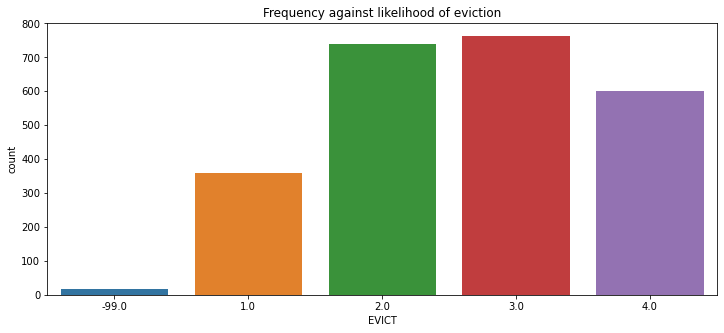

In [228]:
# 1 - Extremely likely to be evicted and 4 - Not at all likely
plt.figure(figsize = (12,5))
sns.countplot(df['EVICT'])
plt.title('Frequency against likelihood of eviction');

**`FORCLOSE`** <br>
Similar to `EVICT` which asks respondents about the likelihood of losing the ability to pay mortgage and thus obligated to give up their homes

In [248]:
df['FORCLOSE'].value_counts(normalize = True) * 100

 4.0     45.689927
 3.0     36.248816
 2.0     13.545943
 1.0      3.915377
-99.0     0.599937
Name: FORCLOSE, dtype: float64

For the remaining respondents, >50% are worried about foreclosure 

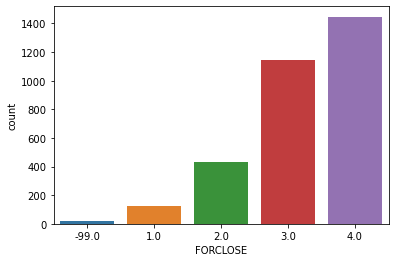

In [245]:
sns.countplot(df['FORCLOSE'])

**`SSAPGM`**
These questions are only asked if response to the application of Social Security Programs after March 13,2020/`SSA_APPLY` is 1(yes) 

In [230]:
df['SSA_APPLY'].value_counts(normalize = True,dropna = False)

 2.0     0.896746
 NaN     0.067033
 1.0     0.023127
-99.0    0.013095
Name: SSA_APPLY, dtype: float64

Therefore, since majority of the population has yet to apply for any Social Security Programs, the responses to the subsequent questions(`SSAPGM1` - `SSAPGM5`) are low and thus could be dropped

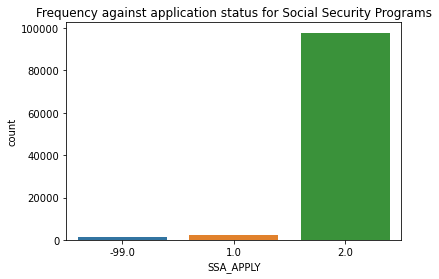

In [235]:
# 1 - Yes, 2 - No
sns.countplot(df['SSA_APPLY'])
plt.title('Frequency against application status for Social Security Programs');

In [249]:
ssapgm_cols = ['SSAPGM1','SSAPGM2','SSAPGM3','SSAPGM4','SSAPGM5']
df.drop(columns = ssapgm_cols,inplace = True)

KeyError: "['SSAPGM1' 'SSAPGM2' 'SSAPGM3' 'SSAPGM4' 'SSAPGM5'] not found in axis"

In [250]:
# Checking for columns with null values
null_columns = df.columns[df.isnull().any()]

percent_null = {}
for col in null_columns:
    percent_null[col] = (df[col].isnull().sum()/len(df)) * 100
sorted_percent_null = sorted(percent_null.items(),key = lambda x: x[1],reverse = True)
sorted_percent_null

[('EVICT', 97.72400069692162),
 ('FORCLOSE', 97.09585423334036),
 ('SSAEXPCT1', 94.96565826998376),
 ('SSAEXPCT2', 94.96565826998376),
 ('SSAEXPCT3', 94.96565826998376),
 ('SSAEXPCT4', 94.96565826998376),
 ('SSAEXPCT5', 94.96565826998376),
 ('WHEREFREE1', 94.74557775719617),
 ('WHEREFREE2', 94.74557775719617),
 ('WHEREFREE3', 94.74557775719617),
 ('WHEREFREE4', 94.74557775719617),
 ('WHEREFREE5', 94.74557775719617),
 ('WHEREFREE6', 94.74557775719617),
 ('WHEREFREE7', 94.74557775719617),
 ('CHILDFOOD', 87.80662258943065),
 ('PSWHYCHG1', 84.99692804284234),
 ('PSWHYCHG2', 84.99692804284234),
 ('PSWHYCHG3', 84.99692804284234),
 ('PSWHYCHG4', 84.99692804284234),
 ('PSWHYCHG5', 84.99692804284234),
 ('PSWHYCHG6', 84.99692804284234),
 ('PSWHYCHG7', 84.99692804284234),
 ('PSWHYCHG8', 84.99692804284234),
 ('PSWHYCHG9', 84.99692804284234),
 ('UI_RECV', 83.48387451742762),
 ('PSPLANS1', 80.4641864815545),
 ('PSPLANS2', 80.4641864815545),
 ('PSPLANS3', 80.4641864815545),
 ('PSPLANS4', 80.464186481

**`SSAEXPCT`**

These questions are asked only if response to the application of Social Security Programs in the next 12 months/`SSALIKELY` is likely(1-3). 

In [255]:
df['SSALIKELY'].value_counts(normalize = True,dropna = False)*100

 4.0     65.274046
 NaN     29.445856
 3.0      2.923403
 1.0      1.255376
 2.0      1.000449
-99.0     0.100870
Name: SSALIKELY, dtype: float64

A large percentage of people are unlikely to apply for the SSP even within the next 12 months. However, there is a large proportion of null values.

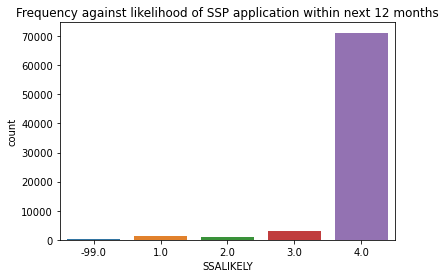

In [258]:
sns.countplot(df['SSALIKELY'])
plt.title('Frequency against likelihood of SSP application within next 12 months');

Since a large proportion of data is missing from the `SSAEXPCT` features and that these features are correlated, they would be dropped.

In [260]:
ssa_cols = ['SSAEXPCT1','SSAEXPCT2','SSAEXPCT3','SSAEXPCT4','SSAEXPCT5']
df.drop(columns = ssa_cols,inplace = True)

In [274]:
df.shape

(109051, 143)